In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB :
    from google.colab import drive
    drive.mount('/content/drive')
    
if IN_COLAB :
  Dataset_path = "/content/drive/MyDrive/Colab Notebooks/DataSets/"
else :
  Dataset_path = "./DataSets/"

ml_path = Dataset_path + "ml-latest/"

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [4]:
Movies_metadata = pd.read_csv(Dataset_path+"Movies_metadata.csv")
Movies_Info = pd.read_csv(Dataset_path+"MoviesInfo.csv")

In [5]:
Movies_metadata.columns

Index(['budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'director_r', 'votes',
       'genres', 'mean_vote', 'original_title', 'date_published', 'duration',
       'genre', 'production_company', 'actors', 'avg_vote', 'movieId',
       'description', 'language', 'country', 'total_votes', 'title', 'year',
       'imdb_title_id', 'writer', 'EU', 'AS', 'NA', 'AF', 'AN', 'SA', 'OC',
       'idk', 'English', 'French', 'Italian', 'German', 'Spanish', 'Russian',
       'Other', 'Comedy', 'Romance', 'Drama', 'Adventure', 'Children',
       'Action', 'Horror', 'Animation', 'Crime', 'Thriller', 'Mystery',
       'Sci-Fi', 'Fantasy', 'IMAX', 'Documentary', 'War', 'Musical', 'Western',
       'Film-Noir', '(no genres listed)'],
      dtype='object')

In [6]:
newdata =  Movies_metadata.drop(['genre', 'production_company', 'actors', 'avg_vote',
       'description', 'language', 'country', 'total_votes', 'title',
       'imdb_title_id', 'writer','original_title' , 'genres','votes', 'date_published' , 'mean_vote'],axis=1)
newdata = pd.merge(newdata,Movies_Info[['movieId' , 'mean_vote']] )

In [7]:
newdata['mean_vote'].describe()

count    39470.000000
mean         6.341269
std          1.021569
min          1.700000
25%          5.800000
50%          6.500000
75%          7.100000
max          9.400000
Name: mean_vote, dtype: float64

In [8]:
pd.options.mode.chained_assignment = None

newdata['mean_vote_class'] = 0
newdata['mean_vote_class'][newdata['mean_vote']>=6.5] = 1
newdata['mean_vote_class'][newdata['mean_vote']<6.5] = 0

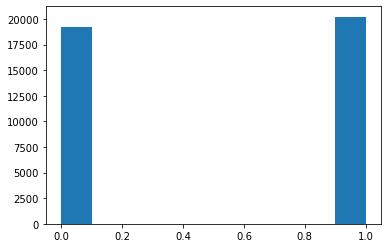

In [9]:
plt.hist(newdata['mean_vote_class'])
plt.show()

In [10]:
#from sklearn.decomposition import PCA
#pca01 = PCA(n_components = 4)
#principlecomp_train = pca01.fit_transform(newdata.drop(['movieId','mean_vote','mean_vote_class'],axis=1))
#pca01.explained_variance_ratio_

array([0.20117544, 0.17365936, 0.09447669, 0.08128914])

### Regression on  mean_vote_class

In [11]:
target = newdata['mean_vote_class'] 
predictors = newdata.drop(['mean_vote','mean_vote_class','movieId'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.30, random_state=40)

In [12]:
model01 = LogisticRegression().fit(X_train,y_train)

C:\Users\PJ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
y_pred01 = model01.predict(X_test)

In [14]:
print('MSE:',mean_squared_error(y_test, y_pred01))
print('MAE:',mean_absolute_error(y_test, y_pred01))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred01)))

MSE: 0.24119584494552826
MAE: 0.24119584494552826
RMSE: 0.49111693612166163


### Regression on  mean_vote

In [15]:
target = newdata['mean_vote'] 
predictors = newdata.drop(['mean_vote','mean_vote_class','movieId'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.30, random_state=40)

### Poisson Regression

In [16]:
model02 = PoissonRegressor().fit(X_train, y_train)

In [17]:
y_pred02 = model02.predict(X_test)

In [18]:
print('MSE:',mean_squared_error(y_test, y_pred02))
print('MAE:',mean_absolute_error(y_test, y_pred02))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred02)))

MSE: 0.48511489852241113
MAE: 0.5403645715051025
RMSE: 0.6965019013056685


### Linear Regression

In [19]:
model03 = LinearRegression().fit(X_train, y_train)

In [20]:
y_pred03 = model03.predict(X_test)

In [21]:
print('MSE:',mean_squared_error(y_test, y_pred03))
print('MAE:',mean_absolute_error(y_test, y_pred03))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred03)))

MSE: 0.44350748301866033
MAE: 0.5134234725564997
RMSE: 0.665963574843745


### Generate Recommendation

In [26]:
import difflib
import random

def get_Movie_info(Movie_id):
    
    """
    Returns some basic information about a Movie given the Movie id and the metadata dataframe.
    """
    
    Movie_info = Movies_metadata[Movies_metadata['movieId'] == int(Movie_id)][['movieId', 'genres', 
                                                            'title', 'original_title', 'year', 'duration']]
    return Movie_info


def generate_recommendation(model,movieid):
    frames = pd.DataFrame()
    
    for i in movieid:
        mask = newdata[newdata.movieId.isin([i])]
        mvote = mask['mean_vote']
        mask = mask.drop(['mean_vote','mean_vote_class','movieId'],axis=1)
        rating = model.predict(mask)
        tmp = get_Movie_info(i)
        tmp['mean_vote'] = mvote
        tmp['pred_mean'] = rating
        frames = frames.append(tmp, ignore_index=True)
    return frames
#.sort_values('rating', ascending=False)

In [27]:
generate_recommendation(model01,[4,7,9,193843,193878])

,movieId,genres,title,original_title,year,duration,mean_vote,pred_mean
0,4,Comedy|Drama|Romance,Donne,Waiting to Exhale,0.194197,1.101678,6.2,1
1,7,Comedy|Romance,Sabrina,Sabrina,0.194197,1.243510,6.5,0
2,9,Action,A rischio della vita,Sudden Death,0.194197,0.487071,5.9,0
3,193843,Action|Drama|Thriller,Raazi,Raazi,1.124696,1.763561,7.8,1
4,193878,Comedy,Les tribulations d'une caissière,Les tribulations d'une caissière,0.841501,0.061575,5.4,0


In [28]:
generate_recommendation(model02,[4,7,9,193843,193878])

,movieId,genres,title,original_title,year,duration,mean_vote,pred_mean
0,4,Comedy|Drama|Romance,Donne,Waiting to Exhale,0.194197,1.101678,6.2,6.660060
1,7,Comedy|Romance,Sabrina,Sabrina,0.194197,1.243510,6.5,6.521109
2,9,Action,A rischio della vita,Sudden Death,0.194197,0.487071,5.9,6.497379
3,193843,Action|Drama|Thriller,Raazi,Raazi,1.124696,1.763561,7.8,8.181444
4,193878,Comedy,Les tribulations d'une caissière,Les tribulations d'une caissière,0.841501,0.061575,5.4,6.293528


In [29]:
generate_recommendation(model03,[4,7,9,193843,193878])

,movieId,genres,title,original_title,year,duration,mean_vote,pred_mean
0,4,Comedy|Drama|Romance,Donne,Waiting to Exhale,0.194197,1.101678,6.2,6.544101
1,7,Comedy|Romance,Sabrina,Sabrina,0.194197,1.243510,6.5,6.393449
2,9,Action,A rischio della vita,Sudden Death,0.194197,0.487071,5.9,6.351709
3,193843,Action|Drama|Thriller,Raazi,Raazi,1.124696,1.763561,7.8,8.098255
4,193878,Comedy,Les tribulations d'une caissière,Les tribulations d'une caissière,0.841501,0.061575,5.4,6.275775
